<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1


# Cargar la base

Las siguientes celdas cargan desde Kaggle la base de datos del Reporte Mundial de la Felicidad 2019.

In [ ]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness

mkdir: cannot create directory ‘/root/.kaggle’: File exists


SecretNotFoundError: Secret KAGGLE_USER does not exist.

¿Cómo se crea el archivo kaggle.json que contiene las credenciales para acceder?

1) Es necesario tener una cuenta en kaggle.com


2) Ir a la sección Account y generar un API token

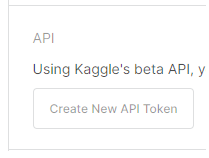

3) Con los datos de la key que nos proporciona Kaggle, guardar los datos en los API secrets de Colab.

In [ ]:
# Extraigo todos los archivos que están en el .zip que acabamos de "bajar".

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [ ]:
# Cargamos la base
df = pd.read_csv('/content/2019.csv')

In [ ]:
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Preguntas

Pregunta 1:
¿Cuál es el score promedio de toda la base?

Ayuda: df.Score.mean()

Pregunta 2: ¿Cuál es el país con mayor indidencia de la esperanza de vida en el Score?  (es decir el país que presenta mayor valor en la columna "Healthy life expectancy").

Ayuda:

La función `max()` devuelve el valor máximo de una serie.

Por ejemplo: `df['Healthy life expectancy'].max()` devuelve el valor máximo de la esperanza de vida. Pero no es eso lo que se pregunta.

La función `idmax()` devuelve el valor de id del valor que maximiza esa serie.

Por ejemplo: `df['Healthy life expectancy'].idxmax()` devuelve el id del país con mayor esperanza de vida.

Entonces, con `df['Country or region'][indice]` obtengo el nombre del país que maximiza la esperanza de vida, si en "indice" pongo el índice de ese país.

También podría traer un listado completo de los valores de ese país haciendo `df.loc[indice]`

Pregunta 3: El siguiente código genera un gráfico con los veinte países de menor score de felicidad.



```
import plotly.express as px
fig = px.bar(df.sort_values('Score')[:20].sort_values('Score') ,y='Country or region',
             x='Score', title='Los 20 países menos felices',orientation='h',height=600)
fig.show()
```

¿Cómo se podría modificar el mismo, de manera de obtener el gráfico de los 20 países más felices?



Pregunta 4: El siguiente código ajusta una regresión lineal con tres variables independientes para predecir la felicidad.



```
from sklearn import linear_model

series=['GDP per capita','Social support', 'Healthy life expectancy']
X=df[series]
y=df['Score']

lr = linear_model.LinearRegression()
lr.fit(X, y)
```

¿Cuál es el R2? ¿Cuáles son los parámetros aprendidos (coeficientes e intercepto)?

Ayuda: lr.score(X,y), lr.coef_, lr.intercept_


Pregunta 5: Imaginemos un país con GDP per cápita igual a 1.2, Social Support igual a 1.5 y expectativa de vida igual a 1. ¿Cuál sería el valor de score de felicidad que tendría de acuerdo con el modelo?

Ayuda:

Se puede hacer con la función integrada en sklearn: lr.predict

O "a mano": Uno por uno, o usando la función np.matmul

El resultado debería ser el mismo en ambos casos, lo que puede servir como chequeo de estar haciendo las cosas bien.
